<a href="https://colab.research.google.com/github/jijan67/Sentiment-Analysis-System-Using-KNN/blob/main/Twitter_Sentiment_Analysis_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the data
df_train = pd.read_csv("/content/drive/MyDrive/Sentiment_analysis/twitter_training.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Sentiment_analysis/twitter_validation.csv")


In [ ]:
# Rename columns
df_train.columns = ['Header1', 'company', 'labels', 'text']
df_test.columns = ['Header1', 'company', 'labels', 'text']


In [ ]:
# Drop unnecessary columns
df_train.drop(columns=['Header1', 'company'], inplace=True)
df_test.drop(columns=['Header1', 'company'], inplace=True)


In [ ]:
# Function to clean tweets
def clean_tweet(tweet):
    if not isinstance(tweet, str):
        return ""
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

In [ ]:
# Clean and preprocess the data
df_train['text'] = df_train['text'].apply(clean_tweet).str.lower()
df_test['text'] = df_test['text'].apply(clean_tweet).str.lower()

In [ ]:
# Remove empty or whitespace-only texts
df_train = df_train[df_train['text'].str.strip() != '']
df_test = df_test[df_test['text'].str.strip() != '']

In [ ]:
# Remove duplicates
df_train = df_train.drop_duplicates(subset=['text'])


In [ ]:
# Separate features and labels
train_texts = df_train['text'].values
train_labels = df_train['labels'].values
test_texts = df_test['text'].values
test_labels = df_test['labels'].values

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
test_tfidf = tfidf_vectorizer.transform(test_texts)

In [ ]:
# Define the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)


In [ ]:
# Train the KNN Model
knn_model.fit(train_tfidf, train_labels_encoded)

KNeighborsClassifier()

In [ ]:
# Evaluate the KNN Model
predictions = knn_model.predict(test_tfidf)


In [ ]:
# Accuracy score
knn_accuracy = accuracy_score(test_labels_encoded, predictions)
print(f'KNN Test Accuracy: {knn_accuracy}')

KNN Test Accuracy: 0.9419419419419419


In [ ]:
# Classification report
print("\nKNN Model Classification Report:\n")
print(classification_report(test_labels_encoded, predictions, target_names=label_encoder.classes_))



KNN Model Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.88      0.96      0.92       171
    Negative       0.94      0.94      0.94       266
     Neutral       0.96      0.96      0.96       285
    Positive       0.97      0.91      0.94       277

    accuracy                           0.94       999
   macro avg       0.94      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



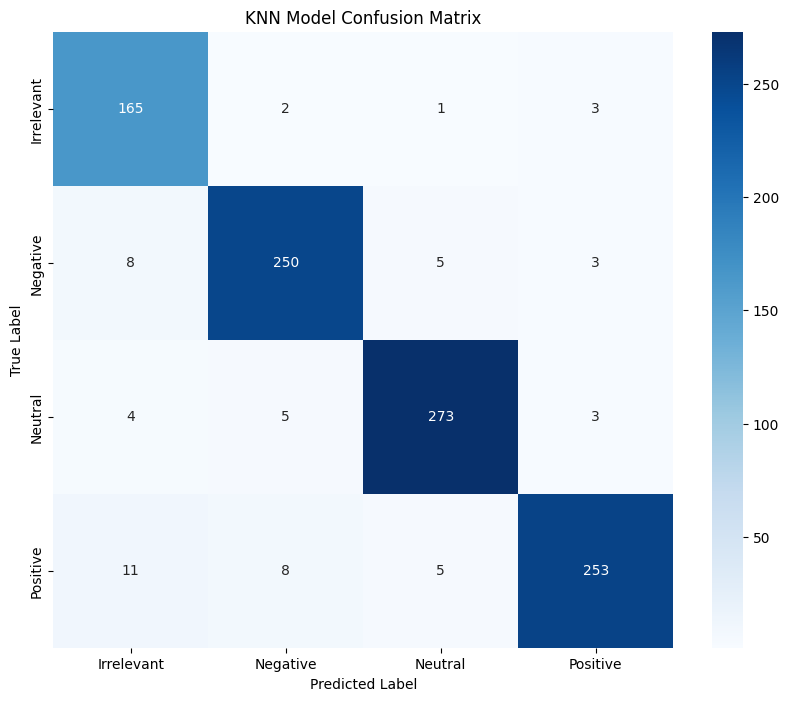

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Prediction function for new text input
def predict_text_knn(text, knn_model, tfidf_vectorizer, label_encoder):
    cleaned_text = clean_tweet(text).lower()
    tfidf_text = tfidf_vectorizer.transform([cleaned_text])
    prediction = knn_model.predict(tfidf_text)
    label_name = label_encoder.inverse_transform(prediction)
    return label_name[0]

# Test the prediction function with a new text
sample_text = "This is an amazing product with great quality!"
predicted_label = predict_text_knn(sample_text, knn_model, tfidf_vectorizer, label_encoder)
print("Predicted Sentiment/Label for sample text:", predicted_label)

Predicted Sentiment/Label for sample text: Irrelevant
